In [160]:
%reload_ext autoreload
%autoreload 2

import math
import sys
from pathlib import Path

import glob2
import numpy as np
import pandas as pd
from azureml.core import Dataset, Workspace
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import convert_age_from_days_to_years, extractqrcode, draw_sex_distribution, draw_age_distribution

### read the csv and total no. of children

In [146]:
DATASET_PATH = Path('/mnt/datasets/depthmap56k')

In [147]:
scans = pd.read_csv(DATASET_PATH / 'labels/scans.csv')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 2106


,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


### getting the total of gender

male      1048
female    1058
Name: sex, dtype: int64


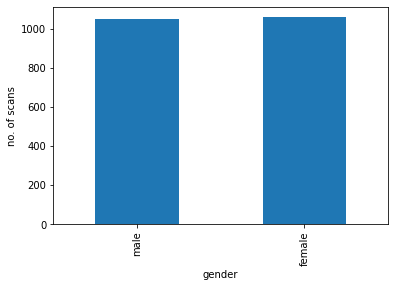

In [148]:
plt.figure()
draw_sex_distribution(scans)
plt.show()

In [149]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(convert_age_from_days_to_years, axis=1)
scans.head()

,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


### plotting the bar graph no. of children against age

0     14
1     63
2    346
3    606
4    705
5    370
6      2
Name: Years, dtype: int64


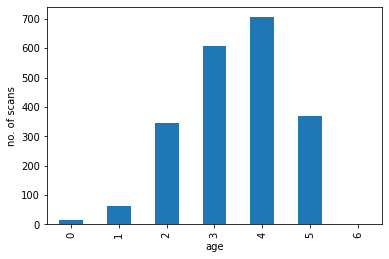

In [157]:
plt.figure()
draw_age_distribution(scans)
plt.show()

### getting the distribition based on gender

In [117]:
male = scans[scans['sex']=='male']
print('No. of male distribution: ')
print(male['Years'].value_counts())

No. of male distribution: 
4    365
3    282
5    189
2    176
1     29
0      7
Name: Years, dtype: int64


In [118]:
female = scans[scans['sex']=='female']
print('No. of female distribution: ')
print(female['Years'].value_counts())

No. of female distribution: 
4    340
3    324
5    181
2    170
1     34
0      7
6      2
Name: Years, dtype: int64


### Reading the csv files and get the data at artifacts level

In [164]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/artifacts.csv')
artifacts.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584997475-0195z663pl_1591588126306_100_001...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
2,pc_1584997475-0195z663pl_1591588126306_100_002...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
3,pc_1584997475-0195z663pl_1591588126306_100_003...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
4,pc_1584997475-0195z663pl_1591588126306_100_004...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl


In [95]:
## dropping the null values from the artifacts 
artifacts  = artifacts.dropna()

In [96]:
print("Total no. of pointclouds:", len(artifacts ))

Total no. of pointclouds: 50149


101.0    21033
100.0    14843
102.0    14246
201.0       19
202.0        8
Name: key, dtype: int64


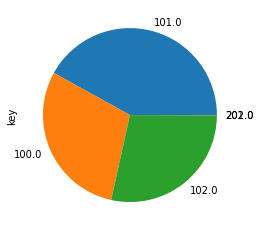

In [97]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

### plotting the height and weight distribution

In [98]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
artifacts.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584997475-0195z663pl_1591588126306_100_001...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
2,pc_1584997475-0195z663pl_1591588126306_100_002...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
3,pc_1584997475-0195z663pl_1591588126306_100_003...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
4,pc_1584997475-0195z663pl_1591588126306_100_004...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl


In [99]:
getheight = artifacts.drop_duplicates(subset=['qrcode']).reset_index(drop=True)
getheight.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584999865-01t0n240ra_1591629837700_100_008...,lD0OAaaZ0pcD0zRk_artifact-scan-pcd_15700608000...,qrcode/1584999865-01t0n240ra/measure/159162983...,86.5,12.45,100.0,good,1584999865-01t0n240ra
2,pc_1583942091-02migjdla1_1591470015961_100_000...,ZPFkcYGhq15raY3J_artifact-scan-pcd_15736032000...,qrcode/1583942091-02migjdla1/measure/159147001...,71.6,8.10,100.0,good,1583942091-02migjdla1
3,pc_1585011777-031jov4jpw_1591815240163_100_000...,D7tiN7CtUEM9WoRx_artifact-scan-pcd_15712704000...,qrcode/1585011777-031jov4jpw/measure/159181524...,78.5,11.75,100.0,good,1585011777-031jov4jpw
4,pc_1585003039-032hniw434_1591707933084_102_000...,8SMAKMkY79LovcBU_artifact-scan-pcd_15708384000...,qrcode/1585003039-032hniw434/measure/159170793...,108.1,15.50,102.0,good,1585003039-032hniw434


In [100]:
print("Total no.unique scans:", len(getheight))

Total no.unique scans: 2106


Text(0, 0.5, 'height')

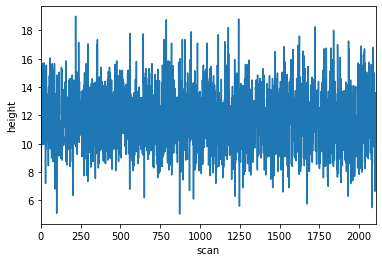

In [101]:
heightax = getheight['weight'].plot()
heightax.set_xlabel('scan')
heightax.set_ylabel('height')

Text(0.5, 0, 'weight')

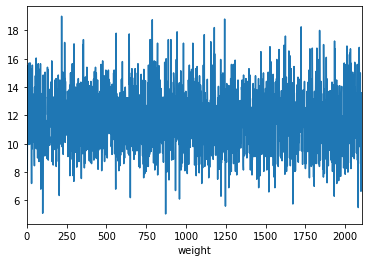

In [102]:
weightax = getheight['weight'].plot()
weightax.set_xlabel('scan')
weightax.set_xlabel('weight')

In [103]:
distribution_data = pd.merge(scans,getheight[['height','weight','qrcode']],on='qrcode', how='left')
distribution_data.head()

,qrcode,person_id,age,sex,Years,height,weight
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4,85.7,9.45
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4,86.5,12.45
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3,71.6,8.10
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3,78.5,11.75
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4,108.1,15.50


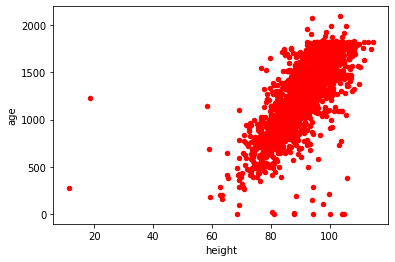

In [104]:
#distribution of height against age
height_vs_age = distribution_data.plot.scatter(x='height', y='age', c='red')

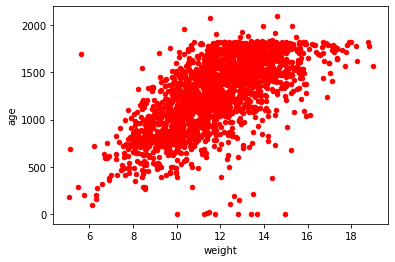

In [105]:
#distribution of weight against age
weight_vs_age = distribution_data.plot.scatter(x='weight', y='age', c='red')

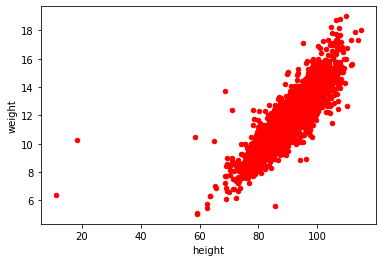

In [106]:
## distribution of height against weight
weight_vs_height = distribution_data.plot.scatter(x='height', y='weight', c='red')

## Check on the amount of artifacts and scans from the dataset

In [107]:
# Takes approx 12 min
dataset = glob2.glob(str(DATASET_PATH / 'qrcode/**/*.pcd'))
len(dataset)

0

In [108]:
print("Total no. of pointclouds in csv:", len(artifacts))
print("Total no. of pointclouds in dataset:", len(dataset))

Total no. of pointclouds in csv: 50149
Total no. of pointclouds in dataset: 0


In [109]:
## extracting the qrcodes
qrcodes_data = []
for path in dataset:
    data =path.split('/')
    qrcodes_data.append(data[4])
qrc_dataframe = pd.DataFrame(qrcodes_data,columns=['qrcodes'])

In [110]:
print("Total no. of scans in dataset:", len(qrc_dataframe['qrcodes'].unique()))
print("Total no. of scans in csv:", len(scans))      

Total no. of scans in dataset: 0
Total no. of scans in csv: 2106
